In [2]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt

In [72]:
df = pd.read_csv("./file/3_23/mincost.csv", sep=",")
df = df.drop(['Unnamed: 15'], axis=1)  
df

,time,dcName,requestNum,finishedRequestNum,dcUsage,dcConsume,dcPrice,reSupply,reUsage,reDcUsage,reBaUsage,rePrice,baSupply,baPrice,cost
0,0,DC_CR,103247,103247,0.803,41524.711,0.000,50767.623,1.0,0.818,0.183,8252.965,9242.913,0.000,8252.965
1,0,DC_OS,103245,103245,0.601,44316.178,0.662,39551.259,1.0,1.000,0.000,1582.051,0.000,0.000,1582.713
2,0,DC_MB,103242,103242,0.755,55507.875,5.307,17299.091,1.0,1.000,0.000,7536.048,0.000,0.000,7541.355
3,0,DC_SH,103240,103240,0.703,46777.500,2.538,28509.407,1.0,1.000,0.000,27462.349,0.000,0.000,27464.887
4,0,DC_LA,103236,103236,0.658,41878.688,4.516,9365.253,1.0,1.000,0.000,8428.728,0.000,0.000,8433.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,604800,DC_CR,107450,128640,1.000,45900.000,0.000,49223.966,1.0,0.933,0.068,3740.924,3323.966,0.000,3740.924
5041,604800,DC_OS,255902,171840,1.000,54000.000,1.421,43772.770,1.0,1.000,0.000,1750.911,0.000,0.000,1752.332
5042,604800,DC_MB,113232,113232,0.828,57381.000,0.000,29814.761,1.0,1.000,0.000,3790.628,-27566.239,0.766,3791.394
5043,604800,DC_SH,24840,24840,0.170,30806.471,1.082,23016.340,1.0,1.000,0.000,18067.714,0.000,0.000,18068.796


In [73]:
df_CR = df.loc[df['dcName'] == 'DC_CR'].reset_index()
df_OS = df.loc[df['dcName'] == 'DC_OS'].reset_index()
df_SH = df.loc[df['dcName'] == 'DC_SH'].reset_index()
df_MB = df.loc[df['dcName'] == 'DC_MB'].reset_index()
df_LA = df.loc[df['dcName'] == 'DC_LA'].reset_index()

In [14]:
df_RePrice = pd.DataFrame({'CR':df_CR['rePrice'], 'OS':df_OS['rePrice'], 'MB':df_MB['rePrice'], 'SH':df_SH['rePrice'], 'LA':df_LA['rePrice']})
df_ReDcUsage = pd.DataFrame({'CR':df_CR['reDcUsage'], 'OS':df_OS['reDcUsage'], 'MB':df_MB['reDcUsage'], 'SH':df_SH['reDcUsage'], 'LA':df_LA['reDcUsage']})


names = ['CR', 'OS', 'MB', 'SH', 'LA']
for name in names:
    for i in range(len(df_RePrice[name])):
        df_RePrice[name][i] = df_RePrice[name][i] * df_ReDcUsage[name][i]

df_RePrice = df_RePrice / 100        

In [55]:
df_rr = df_RePrice.mean(1)

In [59]:
df_ne = df_RePrice.mean(1)

In [63]:
df_mt = df_RePrice.mean(1)

In [67]:
df_mp = df_RePrice.mean(1)

In [71]:
df_mg = df_RePrice.mean(1)

In [75]:
df_mc = df_RePrice.mean(1)

In [76]:
df_rr = pd.DataFrame(df_rr)
df_rr = df_rr.rename(columns = {0:'RR'})

df_ne = pd.DataFrame(df_ne)
df_ne = df_ne.rename(columns = {0:'NE'})

df_mt = pd.DataFrame(df_mt)
df_mt = df_mt.rename(columns = {0:'MT'})

df_mp = pd.DataFrame(df_mp)
df_mp = df_mp.rename(columns = {0:'MP'})

df_mg = pd.DataFrame(df_mg)
df_mg = df_mg.rename(columns = {0:'MG'})

df_mc = pd.DataFrame(df_mc)
df_mc = df_mc.rename(columns = {0:'MC'})

In [77]:
df_all = pd.concat([df_rr, df_ne, df_mt, df_mp, df_mg, df_mc], axis=1)
df_all

,RR,NE,MT,MP,MG,MC
0,103.776156,99.436560,103.995332,103.691105,105.156668,103.520203
1,103.991914,99.470419,104.526776,98.673631,106.786761,102.789282
2,104.671222,97.468300,106.064021,99.363361,103.811844,101.217395
3,102.640364,96.695668,104.247207,106.887190,101.560908,102.206951
4,105.330265,99.310563,99.953821,103.642576,102.667124,99.239276
...,...,...,...,...,...,...
1004,96.460686,100.328205,100.063096,95.196414,100.057080,97.000562
1005,97.627090,95.757660,98.698130,92.168158,100.331884,102.558364
1006,102.240036,95.508608,98.446752,92.446834,96.053830,100.194576
1007,98.182134,99.838080,99.699390,95.153271,99.208514,98.555154


<AxesSubplot:>

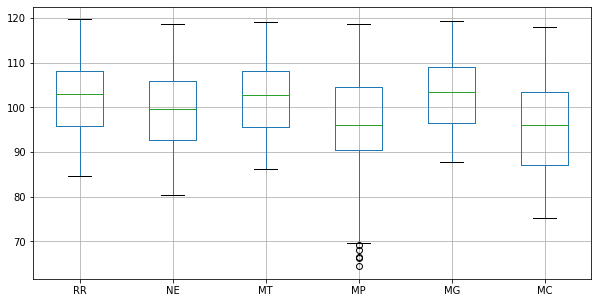

In [78]:
df_all.boxplot(figsize= (10, 5))

In [74]:
df_DcConsume = pd.DataFrame({'CR':df_CR['dcConsume'], 'OS':df_OS['dcConsume'], 'MB':df_MB['dcConsume'], 'SH':df_SH['dcConsume'], 'LA':df_LA['dcConsume']})

In [55]:
df_rr_c = df_DcConsume.sum(1)

In [59]:
df_ne_c = df_DcConsume.sum(1)

In [63]:
df_mt_c = df_DcConsume.sum(1)

In [67]:
df_mp_c = df_DcConsume.sum(1)

In [71]:
df_mg_c = df_DcConsume.sum(1)

In [75]:
df_mc_c = df_DcConsume.sum(1)

In [76]:
df_rr_c = pd.DataFrame(df_rr_c)
df_rr_c = df_rr_c.rename(columns = {0:'RR'})

df_ne_c = pd.DataFrame(df_ne_c)
df_ne_c = df_ne_c.rename(columns = {0:'NE'})

df_mt_c = pd.DataFrame(df_mt_c)
df_mt_c = df_mt_c.rename(columns = {0:'MT'})

df_mp_c = pd.DataFrame(df_mp_c)
df_mp_c = df_mp_c.rename(columns = {0:'MP'})

df_mg_c = pd.DataFrame(df_mg_c)
df_mg_c = df_mg_c.rename(columns = {0:'MG'})

df_mc_c = pd.DataFrame(df_mc_c)
df_mc_c = df_mc_c.rename(columns = {0:'MC'})

In [78]:
df_all_c = pd.concat([df_rr_c, df_ne_c, df_mt_c, df_mp_c, df_mg_c, df_mc_c], axis=1)
df_all_c

,RR,NE,MT,MP,MG,MC
0,229927.683,198589.425,230383.782,230067.478,230171.971,230004.952
1,231942.800,198371.586,231284.074,149955.100,218827.029,198140.959
2,229367.212,197953.229,229761.886,207780.000,219874.965,197677.436
3,227326.699,198206.500,230792.746,210946.025,217780.505,198635.848
4,230149.583,198003.968,230038.427,215326.000,217912.346,199216.652
...,...,...,...,...,...,...
1004,248385.790,215845.097,247057.377,221841.750,237792.538,219671.140
1005,247835.535,214157.620,244078.201,223149.188,237878.752,220139.396
1006,245488.550,213918.906,246344.017,237540.000,237163.339,219209.501
1007,247551.650,213568.850,246872.576,237540.000,238027.573,217615.300


In [89]:
df_all_c.to_csv("./file/3_23/total_energy.csv")

<AxesSubplot:>

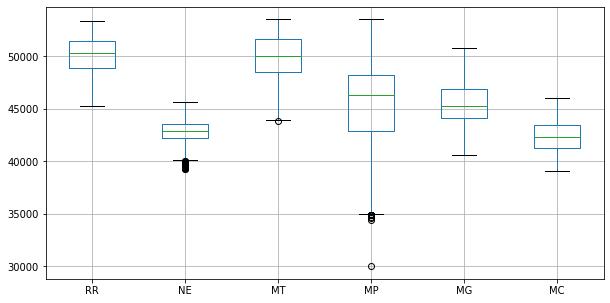

In [51]:
df_all.boxplot(figsize= (10, 5))

In [47]:
df_FinishedRequestNum = pd.DataFrame({'CR':df_CR['finishedRequestNum'], 'OS':df_OS['finishedRequestNum'], 'MB':df_MB['finishedRequestNum'], 'SH':df_SH['finishedRequestNum'], 'LA':df_LA['finishedRequestNum']})

In [18]:
df_rr = df_FinishedRequestNum.sum(1)

In [24]:
df_ne = df_FinishedRequestNum.sum(1)

In [30]:
df_mt = df_FinishedRequestNum.sum(1)

In [36]:
df_mp = df_FinishedRequestNum.sum(1)

In [42]:
df_mg = df_FinishedRequestNum.sum(1)

In [48]:
df_mc = df_FinishedRequestNum.sum(1)

In [51]:
df_all = pd.concat([df_rr, df_ne, df_mt, df_mp, df_mg, df_mc], axis=1)
df_all

,RR,NE,MT,MP,MG,MC
0,515485,357222,521906,516805,517817,516210
1,524843,356278,526924,155215,469561,371750
2,510609,354101,516746,437280,473970,369202
3,501992,355413,523616,450461,462304,374354
4,517599,354271,518879,468696,463582,377197
...,...,...,...,...,...,...
1004,620461,449974,617260,498516,571266,488669
1005,617797,441337,599859,505489,570520,490019
1006,603915,440620,613173,584160,566684,485950
1007,615573,438657,615701,584160,572761,477666


In [90]:
df_all.to_csv("./file/3_23/total_requestnum.csv")

In [86]:
ave_power = []
for i in range(6):
    ave_power.append(df_all_c.sum()[i] / df_all.sum()[i])

In [87]:
ave_power

[0.39521523906696787,
 0.4873257459011563,
 0.39388215068554694,
 0.4258394444163018,
 0.42449883086758755,
 0.47973599393584954]

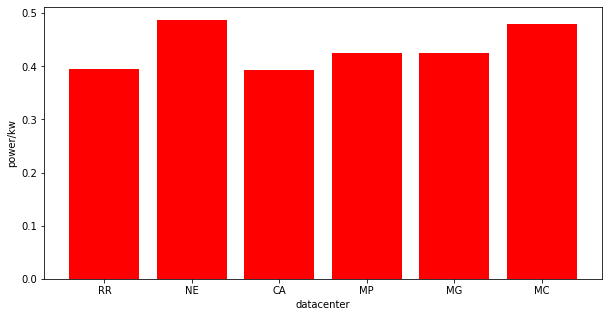

In [93]:
name = ['RR', 'NE', 'CA', 'MP', 'MG', 'MC']

fig = plt.figure(figsize=(10, 5))
plt.bar(name, ave_power, fc='r')
plt.xlabel("datacenter")
plt.ylabel("power/kw")
plt.show()

In [95]:
speed = []
for i in range(6):
    speed.append(df_all.sum()[i]/7/24/3600)

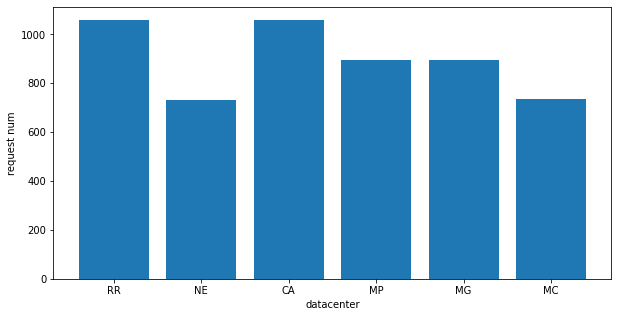

In [98]:
name = ['RR', 'NE', 'CA', 'MP', 'MG', 'MC']

fig = plt.figure(figsize=(10, 5))
plt.bar(name, speed)
plt.xlabel("datacenter")
plt.ylabel("request num")
plt.show()